# 2. MLP基礎
## 概要
本演習ではChapter02で学習した、深層学習の基礎である多層パーセプトロンを穴埋め形式で実装します。<br>
予め用意されたコード（訓練用・テスト用データの取得、ミニバッチ学習など）はそのまま使用し、指示された穴埋め部（順伝播と誤差逆伝播）を編集してください。<br>
演習問題文は<font color="Red">赤字</font>で表示されています。<br>このファイルは必ず最後までコードをすべて実行し、「最後までコードが実行可能」・「学習結果の出力がある」・「学習が成功している」の３つを満たした状態で提出してください。

所要時間：3~5時間

## 回帰モデル演習（スクラッチ）

### データの準備

#### ライブラリのインポート

必要なライブラリをインポートします。エラーになる場合は該当するものをインストールしてください。

In [ ]:
import csv
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
from sklearn import datasets
from sklearn.model_selection import train_test_split
%matplotlib inline
# "%matplotlib inline" の代わりに以下のコマンドを使用できる場合、3次元で座標軸を操作可能なプロットを表示することができます。
# %matplotlib notebook

# 乱数シードを指定
np.random.seed(seed=0)

#### データの３次元散布図を作成する関数

データ可視化に使用します。演習の問題とは関係ありませんので読み飛ばしてください。

In [ ]:
def plot_data(data, name='Data Plot'):
    # グラフ作成
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 軸ラベルの設定
    ax.set_xlabel("X0-axis")
    ax.set_ylabel("X1-axis")
    ax.set_zlabel("Y-axis")

    # 表示範囲の設定
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(0, 10)

    ax.plot(data[:, 0], data[:, 1], data[:, 2],
            "o", color="#ff2222", ms=2, mew=0.5)
    ax.set_title(name)
    plt.show()

#### データの読み込み

本演習では、train_data.csvを訓練用データ、test_data.csvをテスト用データとして使用します。

データはx0, x1, yの3列からなり、以下の式に従う(x0, x1, y)の組にノイズ(微小値)を加えた値が入っています。

$$ y = \left\{ \begin{array}{ll} (x_0-1)^2 + (x_1-1)^2 & (x_0 \gt 0) \\ (x_0+1)^2 + (x_1+1)^2 & (x_0 \leq 0) \end{array} \right. $$

※ここでエラーとなっている場合はライブラリのインポートが完了していないか、正常にデータを読み込めていません。

同ディレクトリ内にダウンロードした`train_data.csv`と`test_data.csv`が存在していることを確認してください。

In [ ]:
# データの読み込み
with open('train_data.csv') as f:
    reader = csv.reader(f)
    train_data = np.array([[float(x) for x in row] for row in reader])
with open('test_data.csv') as f:
    reader = csv.reader(f)
    test_data = np.array([[float(x) for x in row] for row in reader])

#### データの数

訓練時とテスト時で扱うデータ数を確認します。

In [ ]:
N_train = train_data.shape[0]
print('訓練データの数: ', N_train)
N_test = test_data.shape[0]
print('テストデータの数: ', N_test)

#### データの形状

次に、データ"train_data"がどのような形状をしているか確認しましょう。

In [ ]:
#データの最初の10個を表示
train_data[:10]

このような(x0, x1, y)の3次元ベクトルが10000個入っています。


### 演習の目的

この演習では訓練用データの$(x_0, x_1, y)$の組み合わせを学習する多層パーセプトロンモデルを作ります。

学習したモデルを用いて、テストデータ2000個の$(x_0, x_1)$から$y$の値を予測します。

予測の性能評価は、正解値に対する予測値の損失(コスト)を計算し、その推移で判断します。


#### データのプロット

予め作成した関数を使って、データの散布図を表示してみます。

In [ ]:
# 訓練データを可視化
plot_data(train_data, 'Train Data')

データを可視化すると全体像が分かりやすくなります。

今回は関数形があらかじめ決まっているため可視化の効果は薄いですが、現実のデータはもっと複雑です。

そのため、全体像を捉えて「外れ値が多いな」「データ数が少ないな」などざっくり感想を持っておくと良いです。

### 活性化関数

#### ReLU関数

* <font color="Red">問1. ReLUを完成させてください。</font>

```
引数:
    v: [N, M] (np.float)
       Nはバッチサイズにあたる
返値:
    [N, M] (np.float)
```

- 以下の式で定義されるrelu関数を実装します。
$$ \text{ReLU}(x) = \left\{ \begin{array}{ll} x & (x \gt 0) \\ 0 & (x \leq 0) \end{array} \right. $$
- 引数`v`の各要素と0の大きい方を取り、`x`とします。
- ヒント: np.maximum()

#### 適当な値で関数を使ってみる

コーディング演習では様々な関数を使用します。見たことのない関数もたくさんあるでしょう。

後半になるほど関数の挙動も複雑になるため、解答するのがだんだん難しくなってきます。

しかし、慌てる必要はありません。まずは知らない関数が出てきたら、調べて試してみましょう。

関数を試す場合に着目するのは、以下の3点です。

- 入力：どんな形式の値を入力するのか？
- 引数：引数(オプション)でどのように挙動が変わるのか？
- 出力：最終的に何が得られるのか？

入力データを引数として扱う文献が多いですが、ここではあえて区別します。

本文中の「引数」は「入力データ以外のオプション」としての引数を指します。

#### np.maximum()のテスト

np.maximum()はご存知の人も多いかもしれませんが、これを例に試してみましょう。

#### 基本的なスカラーの場合

In [ ]:
#1と0では1の方が大きい
np.maximum(1, 0)

In [ ]:
#0と-1では0の方が大きい
np.maximum(0, -1)

#### 2次元以上のデータの場合

入力がスカラーではなく、ベクトルだったらどうなるでしょうか。

In [ ]:
# 2次元配列を作成
x = np.array([0, 7, -2])
y = np.array([1, 4, -7])

np.maximum(x,y)

この場合、対応する各要素について値が大きい方を組み合わせて、新しい配列が作成されます。

第1要素は```np.maximum(0,1)```の結果、第2要素は```np.maximum(7,4)```の結果というわけですね。

3次元以上のベクトルでも同様の挙動となります。

#### 解答欄

簡単な関数ですが、挙動をテストしてみました。

関数の構造上、入力・引数・出力はどんな関数にも存在するため、躓いたらまずはこの3点を徹底的に確認しましょう。

それでは解答を書いてみましょう。

In [ ]:
x = 1 >>> ReLU(x) = 1
x = -2 >>> ReLU(x) = 0
x = 0.1 >>> ReLU(x) = 0.1
x = -0.5 >>> ReLU(x) = 0

In [ ]:
def relu(v):
    x =  np.maximum(v,0) ### 問1 ###
    return x

#### softmax関数
* <font color="Red">問2. softmax関数を完成させてください。</font>

```
引数:
    x: [N, M] (np.float)
       Nはバッチサイズにあたる
返値:
    [N, M] (np.float)
```

バッチ計算が可能なsoftmax関数を実装します。<br>
exp関数がオーバーフローすることを防ぐために、各データについて入力信号の最大値を引いて、0以下にします。<br>
    numpyでは```[N, M] - [N]```の計算はブロードキャストができませんので、```x```を転置し```[M, N] - [N]```の形で計算を行ったあと、さらに転置をして元の形に戻します。
$$ \text{Softmax}(x_{ij}) = \frac{\exp (x_{ij}^{\prime})}{\sum_{k}^{M}\exp (x_{ik}^{\prime})} \\ $$
$$    x_{ij}^{\prime} = x_{ij} - max_{j}(x_{ij}) $$

#### softmax関数のポイント(1)：入力と出力

先ほどより関数は複雑になりましたが、やることは同様です。入力・引数・出力を確認しましょう。

softmax関数については、chapter2スライドの「順伝播/活性化関数」のセクションで解説されています。

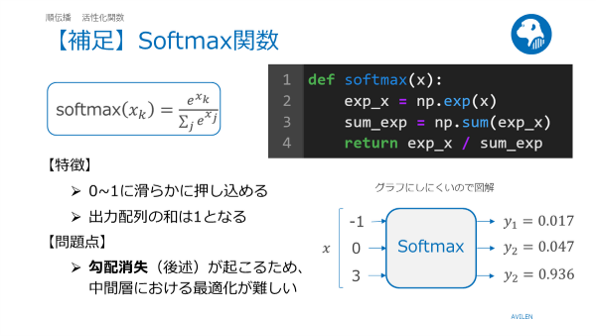

解説より、入力・出力ともにn次元ベクトルであることが分かります。

異なるのは値の範囲ですね。入力ベクトルの各要素に制限はありませんが、出力ベクトル各要素は0～1の範囲で、その合計は1になります。

#### softmax関数のポイント(2)：バッチ計算と関数のaxis

#### バッチ計算

問題文より「バッチ計算」に対応させる必要があります。

これは入力ベクトルxが複数存在する場合に、一気に計算できるようにするという意味です。

学習データを10個ずつ、30個ずつなどのまとまりにして入力ベクトルを作成し、それを一気に活性化関数に通す処理を「バッチ処理」と言います。

出力は各データ、つまり1つ1つの入力ベクトルについて算出される必要があるのです。

たとえば```[-1,0,3]```と```[4,-2,9]```の2つのベクトルが入力された場合、出力すべき配列は2つになります。

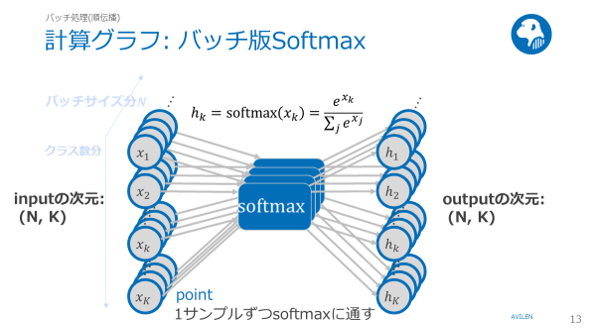

問題文ではこの処理を指して引数x: [N, M] (Nはバッチサイズにあたる)と返値:[N, M]を説明しています。

#### 関数のaxis

このとき、総和(Σ)を取る時点で```np.sum```を使用するのですが、ここに落とし穴があります。

まずは普通に総和を取ってみましょう。

In [ ]:
x = np.array([[-1,0,3],[4,-2,9]]) 
print(np.sum(x))

これではデータごと、つまり各入力ごとの計算になっていません。```np.max```についても同様です。

これを解決するには、引数```axis```を指定する必要があります。

In [ ]:
x = np.array([[-1,0,3],[4,-2,9]]) 
print(np.sum(x,axis=0))
print(np.sum(x,axis=1))

```axis```の指定により、行ごと・列ごとの計算ができるようになりました。

```axis=0```で列ごと、```axis=1```で行ごとの計算になります。

#### softmax関数のポイント(3)：オーバーフロー対策

解説より、ベクトルxについて```np.exp```を適用し、その和を取って各要素の比率を算出すればsoftmax関数が完成します。

しかし、この実装ではオーバーフローになる場合があります。

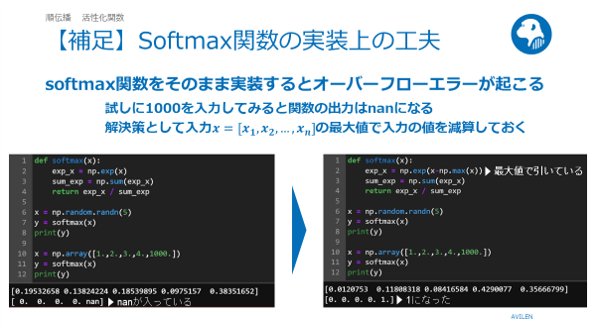

そこで「入力ベクトルの各要素から最大値を引き算する」という操作が必要になります。

#### softmax関数のポイント(4)：ブロードキャスト対策

ここで問題文にもある通り、ブロードキャストの仕様で問題が発生します。

具体的には、[N, M]のベクトルと [N, 1]のベクトルの演算はエラーになります。

例として[3,2]の配列で実験します。

In [ ]:
x = np.array([[1,3],[4,2],[0,5]]) #配列を定義
print(x)

In [ ]:
y = np.max(x,axis=1) #各行の最大値を計算
print(y) 

In [ ]:
print(x-y) #配列から最大値を引き算

しかし、転置して[M, N] のベクトルと[1, N]のベクトルの演算にすると計算できる仕様になっています。

これをsoftmax関数でも適用するため、```x.T```で入力ベクトルを転置する必要があったのです。

なお、転置は最後に戻してあげましょう。解答欄ではreturnの```x.T```が転置を戻す操作になります。

In [ ]:
x = np.array([[1,3],[4,2],[0,5]]) #配列の定義
x = x.T #配列を転置
y = np.max(x,axis=0) #列ごとの最大値を計算
print((x-y).T) #転置を戻す

#### 解答欄

In [ ]:
def softmax(x):
    x = x.T
    x =  ### 問2-1 ###
    x =  ### 問2-2 ###
    return x.T

#### sigmoid関数
* <font color="Red">問3. sigmoid関数を完成させてください。</font>

```
引数:
    x: [N, M] (np.float)
       Nはバッチサイズにあたる
返値:
    [N, M] (np.float)
```

バッチ計算が可能なsigmoid関数を実装します。<br>

$$   \text{Sigmoid}(x) = \frac{1}{1 + \exp(-x)} $$

シグモイド関数はsoftmax関数よりは単純な構成です。

解説スライドより、a=1の場合であることが分かりますね。

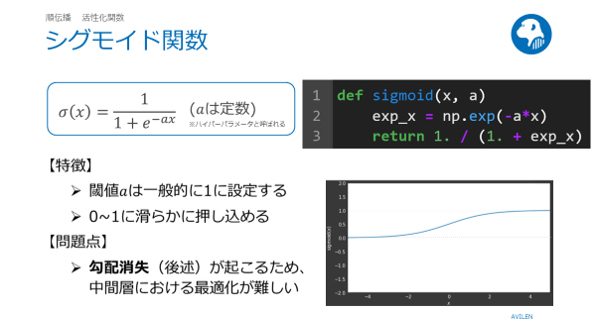

#### 解答欄

入力・出力の指定がfloat型であることに注意しましょう。

In [ ]:
def sigmoid(x):
    return  ### 問3 ###

#### tanh関数
* <font color="Red">問4. tanh関数を完成させてください。</font>
  * <font color="Red">問4-1. tanh関数の分子にあたるsinh(双曲線正弦関数)の式を記述しましょう。</font>
  * <font color="Red">問4-2. tanh関数の分母にあたるcosh(双曲線余弦関数)の式を記述しましょう。</font>

```
引数:
    x: [N, M] (np.float)
       Nはバッチサイズにあたる
返値:
    [N, M] (np.float)
```

バッチ計算が可能なtanh関数を実装します。<br>
tanh関数は以下のように定義されている。<br>

$$   \text{tanh}(x) = \frac{\exp(x) - \exp(-x)}{\exp(x) + \exp(-x)} $$

tanh関数はハイパボリックタンジェントやタンエイチと読み、sinh関数とcosh関数を用いて以下のように書き直すことができる。

$$   \text{tanh}(x) = \frac{\text{sinh}(x) }{\text{cosh}(x) } $$

sinh関数はハイパボリックサインやシャイン、cosh関数はハイパボリックコサインやコッシュと読み、以下のように定義されている。

$$   \text{sinh}(x) = \frac{\exp(x) - \exp(-x)}{2} $$

$$   \text{cosh}(x) = \frac{\exp(x) + \exp(-x)}{2} $$

#### 解答欄

上記の式に従えばコーディングできるはずです。引き続きfloat型に注意！

In [ ]:
def tanh(x):
    sinh =  ### 問4-1 ###
    cosh =  ### 問4-2 ###
    return sinh / cosh

#### Leaky ReLU関数

* <font color="Red">問5. Leaky ReLUを完成させてください。</font>

```
引数:
    x: [N, M] (np.float)
       Nはバッチサイズにあたる
返値:
    [N, M] (np.float)
```

- 以下の式で定義されるLeaky ReLU関数を実装します。

$$ \text{Leaky ReLU}(x,\alpha) = \left\{ \begin{array}{ll} x & (x \gt 0) \\ \alpha x & (x \leq 0) \end{array} \right. $$
- $\alpha$は定数。

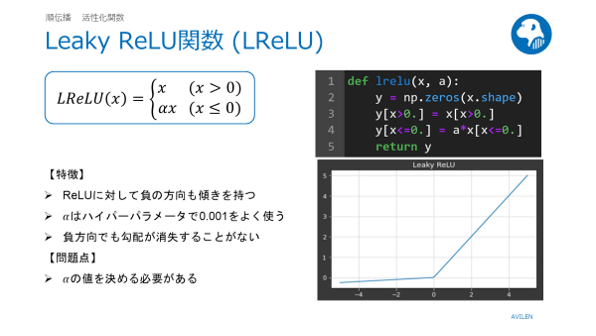

#### 場合分けを考える

問題では $\alpha$=0.01 と指定されています。$\alpha$はハイパーパラメータで、正の数となります。

Leaky ReLU関数では、$x$の正負によって場合分けするので、if文を使えば良いと考える方もいるでしょう。

しかし、いくつかの$x$について実験してみると、実はif文を使わなくてもLeaky ReLU関数が書けるのです。

- $x$ = 3 の場合：$\alpha x$ = 0.03で、LReLU($x$) = 3
- $x$ = -1 の場合：$\alpha x$ = -0.01で、LReLU($x$) = -0.01
- $x$ = 0.5 の場合：$\alpha x$ = 0.005で、LReLU($x$) = 0.5

$x$と$\alpha x$の値を見比べてみてください。大きい方がLReLU($x$)の出力になっていませんか？

そこに気付くことが出来れば、この関数を完成できるはずです。

#### 解答欄

In [ ]:
def lrelu(x, alpha=0.01):
    x =  ### 問5 ###
    return x

#### コスト関数 平均二乗誤差
以下の式で定義される平均二乗誤差を実装します。出題範囲ではないですが、確認しておいてください。
```
引数:
    t: [N, M] (np.float)
    y: [N, M] (np.float)
       Nはバッチサイズにあたる
返値:
    mse: [M] (np.float)
```


$$
\text{MSE} = \frac{1}{NM} \sum_{i}^{N}\sum_{j}^{M} (t_{ij}-y_{ij})^2
$$
- `t`と`y`の差の2乗の平均を取り、`mse`とします。
- 今回のように、M=1（目的変数が一つ）である場合が多い

In [ ]:
def MSE(t, y):
    mse = np.mean(np.square(t - y))
    return mse

#### 多層パーセプトロンの定義

<font color="Red">問6-1~問6-4. MLPクラスの順伝播forward関数を完成させてください。</font>
- 以下の式で定義される順伝播を実装します。(Φは活性化関数)
$$
X_{i+1} = \phi(X_i \cdot W_i + B_i)
$$    
- 第1層`self.layer1`を定義します。入力層`self.layer0`と重み`self.w1`との行列積を取り、バイアス`self.b1`を加算します。そして活性化関数`relu`に渡します。
- 第2層`self.layer2`を定義します。第1層`self.layer1`と重み`self.w2`との行列積を取り、バイアス`self.b2`を加算します。そして活性化関数`relu`に渡します。
- 第3層`self.layer3`を定義します。第2層`self.layer2`と重み`self.w3`との行列積を取り、バイアス`self.b3`を加算します。そして活性化関数`relu`に渡します。
- 出力層`self.out`を定義します。第3層`self.layer3`と重み`self.w4`との行列積を取り、バイアス`self.b4`を加算します。
- 出力層では活性化関数Φは使用しないことに注意せよ
- ヒント: np.dot()　もしくは np.matmul()

<font color="Red"> 問6-5~問6-8. MLPクラスの逆伝播によって誤差と勾配を求めるbackward関数を完成させてください。</font>
- 出力層誤差`delta4`を定義します。二乗誤差の微分なので、以下の式に従います。  <br>
$$
\delta_{out} = \frac{d(T-Y)^2}{dY} = -2(T-Y)
$$　
- 誤差逆伝播は以下の式に従います。
$$
\delta_i = \phi'(v_{i+1})*\delta_{i+1} \cdot W_{i+1}^t
$$
$$
\phi'(v_i) = \left\{ \begin{array}{ll} \frac{d}{dv_i}  v_i & (v_i \gt 0) \\ \frac{d}{dv_i} 0 & (v_i \leq 0) \end{array} \right. = 
                \left\{ \begin{array}{ll} 1 & (v_i \gt 0) \\ 0 & (v_i \leq 0) \end{array} \right.
$$
- 第3層誤差`delta3`を定義します。出力層誤差`delta4`と重み`self.w4`の転置との行列積を取ります。
- 第2層誤差`delta2`を定義します。第3層誤差`delta3`と重み`self.w3`の転置との行列積を取り、第3層`self.layer3`におけるreluの微分との積を取ります。
- 第1層誤差`delta1`を定義します。第2層誤差`delta2`と重み`self.w2`の転置との行列積を取り、第2層`self.layer2`におけるreluの微分との積を取ります。
- ヒント: numpy.dot(), numpy.transpose(), numpy.where()
- ヒント: reluの微分は該当する層の各要素が0より大きいものは1, 0以下のものは0としたベクトルに等しい

### 問6-1~6-4のコツ：順伝播の計算に慣れよう

多層パーセプトロンの計算を完成させる問題ですね。とても複雑なように見えます。

ここはまず問6-1に絞って考えてみます。

#### Step1:必要な変数/関数を把握する

複雑なコーディングの際は、計算の際にどの変数/関数が必要になるか把握するのがコツです。

問題文より、入力層self.layer0と重みself.w1、バイアスself.b1、そして活性化関数reluが必要なことが分かります。

#### Step2:変数の形状を確認する

変数名と関数名を把握したら、変数の形状を確認しましょう。

なお入力データの形状は「一度に学習させるデータの数」によって変わります。今回は1個ずつ学習させるものとします。

- 入力self.layer0:[1,2]、つまり2次元($x_0,x_1$)のベクトル
- 重みself.w1: [2,50] 、つまり2行×50列の行列
- バイアスself.b1:[1,50]、つまり50次元ベクトル

#### Step3:簡単な値を入れて変数を宣言し、計算してみる

layer0,w1,b1の形状が分かったので、簡単な値を入れて実験してみます。

w1,b1についてはコード内の「重みの定義」「バイアスの定義」を参照してください。

乱数を使って目的の次元数の行列・ベクトルを作り出しています。

In [ ]:
layer0 = np.array([1,-2])
w1 = np.random.randn(2, 50) * 0.1
b1 = np.zeros(50, dtype=float)

#### Step4:行列積・加算・そしてReLU

あとは多層パーセプトロンの解説通りに計算していきます。

入力に重みを掛けて、バイアスを加えて、活性化関数に通してみましょう。

行列積の計算には```np.dot```関数を使用します。ReLU関数は問1で作成したものを使いましょう。

In [ ]:
y = np.dot(layer0,w1) + b1 #行列積とバイアスの加算
y = relu(y) #ReLU関数
print(y)
print(y.shape)

この層の出力は50次元のベクトルになります。

#### Step5:次の層へ

最初の層の計算が完成したら、次の層も同様に組んでいきます。

計算手順は一緒ですが、重みやバイアスの形状が違うので注意してください。

最終的に第4層の出力は$y$の値、つまりスカラーになるはずです。

#### 解答欄(あとで下のセルに転記しましょう)

In [ ]:
self.layer0 = x
self.layer1 = ### 問6-1 ###
self.layer2 = ### 問6-2 ###
self.layer3 = ### 問6-3 ###
self.out = ### 問6-4 ###

### 問6-5~6-8のコツ：逆伝播の計算

次は多層パーセプトロンの逆伝播を完成させる問題ですね。これも複雑なように見えますが、1つずつ紐解いていきましょう。

#### 二乗誤差delta4

ここもまず問6-5を考えてみます。

出力層誤差delta4は問題文より、$\delta_{out} = -2(T-Y)$であることが分かります。

$t$は真の値、$y$は予測した値(順伝播の最終出力)となるので、これを用いて計算しましょう。

今回は1個ずつ学習させるものとした場合、$t$も$y$もスカラーとなります。

#### 逆伝播delta3

問題文より、出力層誤差delta4と重みself.w4の転置との行列積を取れば良いですね。

delta4はスカラー、重みw4は[10,1]の行列となります。

転置には```.transpose()```を使います。

簡単な数値で実験してみましょう。

In [ ]:
delta4 = -20 #出力層誤差
w4 = np.random.randn(10, 1) * 0.1 #重み
delta3 = np.dot(delta4, w4.transpose()) #行列積と転置の計算
print(delta3)

#### 逆伝播delta2,delta1

問題文より、第3層誤差delta3と重みself.w3の転置との行列積を取りますが、もう1つ操作があります。

それは第3層self.layer3におけるreluの微分との積を取ることです。この「reluの微分」というのがネックです。

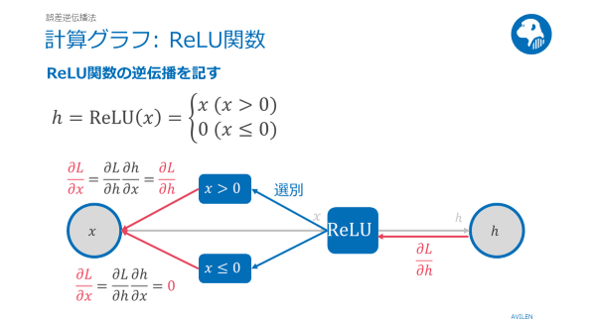

そこで問題文をもう少し読んでみましょう。

「reluの微分は該当する層の各要素が0より大きいものは1, 0以下のものは0としたベクトルに等しい」とありますね。

ここで「該当する層」とは、逆伝播の対象となる層を指します。この場合は第3層誤差が対象なのでlayer3ですね。

そこで、layer3の各要素の値が0より大きいかどうかでベクトルを作成することになります。

if文やfor文を使っても記述できますが、ここで役立つのがnp.whereです。

#### np.where()の実験

np.where()を使うと、NumPy配列に対して、条件を満たす要素を置換したり特定の処理を行ったりすることができます。

条件を満たす要素のインデックス（位置）を取得することも可能です。

初めて使う人も多い関数なので、実験してみましょう。

In [ ]:
a = np.arange(9).reshape((3, 3))
print(a)
# [[0 1 2]
#  [3 4 5]
#  [6 7 8]]

print(np.where(a < 4, -1, 100))

これは、3×3の行列で4以上の値を100に変換し、そうでない値を-1に変換する操作です。

np.where(条件式, x, y)で入力すると、条件式を満たす場合は$x$、満たさない場合は$y$を返します。

これを使えば「0より大きいなら1を返して、0以下なら0を返す」という条件の配列が作れるはずです。

#### 解答欄(あとで下に転記しましょう)

In [ ]:
# 出力層の誤差デルタは二乗誤差の微分
delta4 = ### 問6-5 ###
# 誤差逆伝播
delta3 = ### 問6-6 ###
delta2 = ### 問6-7 ###
delta1 = ### 問6-8 ###

In [ ]:
# 回帰モデル
class MLP_regressor():
    '''
    多層パーセプトロン Multi Layered Perceptron
    構成: [入力層, 第1層, 第2層, 第3層, 出力層]
    ノード数: [2, 50, 50, 10, 1]
    '''

    def __init__(self):
        '''
        コンストラクタ
        パラメータ（重みw, バイアスb）の定義
        第1層重み self.w1: [2, 50] 平均0, 標準偏差0.1の乱数
        第2層重み self.w2: [50, 50] 平均0, 標準偏差0.1の乱数
        第3層重み self.w3: [50, 10] 平均0, 標準偏差0.1の乱数
        第4層重み self.w4: [10, 1] 平均0, 標準偏差0.1の乱数
        
        第1層バイアス self.b1: [50] 要素が全て0
        第2層バイアス self.b2: [50] 要素が全て0
        第3層バイアス self.b3: [10] 要素が全て0
        第4層バイアス self.b4: [1] 要素が全て0
        
        numpyの乱数については以下のページを参照
        https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
        '''
        
        # 重みの定義
        self.w1 = np.random.randn(2, 50) * 0.1
        self.w2 = np.random.randn(50, 50) * 0.1
        self.w3 = np.random.randn(50, 10) * 0.1
        self.w4 = np.random.randn(10, 1) * 0.1

        # バイアスの定義
        self.b1 = np.zeros(50, dtype=float)
        self.b2 = np.zeros(50, dtype=float)
        self.b3 = np.zeros(10, dtype=float)
        self.b4 = np.zeros(1, dtype=float)

    def forward(self, x):
        '''
        順伝播
        入力 x: [N, 2]
        入力層 self.layer0: [N, 2]
        第1層 self.layer1: [N, 50]
        第2層 self.layer2: [N, 50]
        第3層 self.layer3: [N, 10]
        出力層 self.out: [N, 1]
        '''
        
        self.layer0 = x
        self.layer1 = ### 問6-1 ###
        self.layer2 = ### 問6-2 ###
        self.layer3 = ### 問6-3 ###
        self.out = ### 問6-4 ###
        return self.out

    def backward(self, t, y):
        '''
        逆伝播
        真の値 t: [N, 1]
        予測値 y: [N, 1]
        
        出力層誤差 delta4: [N, 1]
        第3層誤差 delta3: [N, 10]
        第2層誤差 delta2: [N, 50]
        第1層誤差 delta1: [N, 50]
        
        第4層b勾配 dedb4: [N, 1]
        第3層b勾配 dedb3: [N, 10]
        第2層b勾配 dedb2: [N, 50]
        第1層b勾配 dedb1: [N, 50]
        
        第4層w勾配 dedw4: [N, 10, 1]
        第3層w勾配 dedw3: [N, 50, 10]
        第2層w勾配 dedw2: [N, 50, 50]
        第1層w勾配 dedw1: [N, 2, 50]
        '''
        
        # 出力層の誤差デルタは二乗誤差の微分
        delta4 = ### 問6-5 ###
        # 誤差逆伝播
        delta3 = ### 問6-6 ###
        delta2 = ### 問6-7 ###
        delta1 = ### 問6-8 ###

        # バイアスbのコスト関数eに対する勾配
        self.dedb4 = np.mean(delta4, axis=0)
        self.dedb3 = np.mean(delta3 * (self.layer3 > 0), axis=0)
        self.dedb2 = np.mean(delta2 * (self.layer2 > 0), axis=0)
        self.dedb1 = np.mean(delta1 * (self.layer1 > 0), axis=0)

        # 重みwのコスト関数eに対する勾配
        self.dedw4 = np.dot(self.layer3.T, delta4) / delta4.shape[0]
        self.dedw3 = np.dot(self.layer2.T, delta3 * (self.layer3 > 0)) / delta3.shape[0]
        self.dedw2 = np.dot(self.layer1.T, delta2 * (self.layer2 > 0)) / delta2.shape[0]
        self.dedw1 = np.dot(self.layer0.T, delta1 * (self.layer1 > 0)) / delta1.shape[0]

    def optimize_GradientDecent(self, lr):
        '''
        勾配降下法によるパラメータの更新
        '''
        self.b1 -= lr * self.dedb1
        self.b2 -= lr * self.dedb2
        self.b3 -= lr * self.dedb3
        self.b4 -= lr * self.dedb4

        self.w1 -= lr * self.dedw1
        self.w2 -= lr * self.dedw2
        self.w3 -= lr * self.dedw3
        self.w4 -= lr * self.dedw4

#### 学習

以下ではこれまでで定義した多層パーセプトロンを使用し、データを学習します。
コストが正常に減少し、500epochで0.5以下にまで到達していれば学習は成功していると言えます。

In [ ]:
# モデルの定義
model = MLP_regressor()

# 学習率
lr = 0.01
# 学習エポック数
n_epoch = 500

x_train = train_data[:, 0:2]
t_train = train_data[:, 2:3]
x_test = test_data[:, 0:2]
t_test = test_data[:, 2:3]

# n_epoch繰り返す
for n in range(n_epoch):
    # 訓練
    # Chapter02範囲外のため、ミニバッチは使用しない
    y = model.forward(x_train)
    train_loss = MSE(t_train, y)
    model.backward(t_train, y)
    model.optimize_GradientDecent(lr)

    # テスト
    y = model.forward(x_test)
    test_loss = MSE(t_test, y)

    print('EPOCH ', n + 1, ' | TRAIN LOSS ',
          train_loss, ' | TEST LOSS ', test_loss)
regression_loss = test_loss

#### 予測データの散布図

予測値の散布図と訓練データの散布図を比較してみましょう。

In [ ]:
y = model.forward(x_test)
predict_data = np.concatenate([x_test, y], axis=1)
plot_data(predict_data, 'Predict Data')

## 分類モデル演習（スクラッチ）

---

### データ準備

回帰モデル演習では層ごとに変数を定義し全計算を実装しましたが、分類モデル演習ではクラスと計算グラフを利用し、より汎用的なモデルを設計します。

#### データの読み込み
本演習では、MNISTを使用し、全結合ネットワークで手書き数字の画像の10分類を行います。

今回はデータセットとして、"MNIST"を用います。

"MNIST"は0~9の手書き数字が画像になった画像データと書かれた数字の正解ラベルで構成されており、チュートリアルでよく使われています。データセット全体は70000件で構成されています。

`sklearn`の`train_test_split`を用いてMNISTデータを訓練データとテストデータに分割します。

引数`test_size=0.2`と指定することで、訓練データ:テストデータ = 8:2 に分割することが出来ます。

データは 1チャンネル 28×28 の配列となっています。


In [ ]:
# mnistデータセットのロード(ネットワーク接続が必要・少し時間がかかります)
mnist = datasets.fetch_openml('mnist_784', as_frame=False)
# 画像とラベルを取得
X, T = mnist.data, mnist.target
# 訓練データとテストデータに分割
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2)

In [ ]:
# ラベルデータをint型にし、one-hot-vectorに変換します
T_train = np.eye(10)[T_train.astype("int")]
T_test = np.eye(10)[T_test.astype("int")]

#### one-hot-vectorとは？
たとえば$a$が，0~9の整数のみを含むベクトルだとわかっている時に、各要素を数字に該当する列の要素のみが1、その他が0となるようなベクトルにする。
$$
\begin{equation*}
a=
\begin{pmatrix}
1\\
8\\
4\\
2\\
0
\end{pmatrix}\to
a\_onehot = 
\begin{pmatrix}
0, 1, 0, 0, 0, 0, 0, 0, 0, 0\\
0, 0, 0, 0, 0, 0, 0, 0, 1, 0\\
0, 0, 0, 0, 1, 0, 0, 0, 0, 0\\
0, 0, 1, 0, 0, 0, 0, 0, 0, 0\\
1, 0, 0, 0, 0, 0, 0, 0, 0, 0
\end{pmatrix}
\end{equation*}
$$
学習する正解ラベルデータは，one-hot-vectorで表されることが多い．

#### データの構造
データ数、画像データXの形、ラベルTの形などを調べます。

In [ ]:
print('訓練データの画像の形:', X_train.shape)
print('テストデータの画像の形:', X_test.shape)

print("\n"'訓練データのラベルTの形:', T_train.shape)
print('テストデータのラベルTの形:', T_test.shape)

#### データのサンプリング
画像・ラベルデータをランダムにいくつか取り出して可視化します。
画像は784要素の1次元ベクトルとしてXに格納されていますが、画像として表示するときは28x28の二次元にreshapeします。

In [ ]:
# テストデータをランダムサンプリング
perm = np.random.permutation(len(X_test))
# サンプル画像を表示する
plt.gray()
for i in perm[:3]:
    plt.imshow(X_test[perm[i]].reshape(28, 28))
    plt.show()
    print('Label: ', np.argmax(T_test[perm[i]]))

### 多層パーセプトロンの定義

#### クロスエントロピー誤差
以下の式で定義される平均二乗誤差を実装します。出題範囲ではないですが、確認しておいてください。<br>
```
引数:
    t: [N, M] (np.float)
    y: [N, M] (np.float)
返値:
    error: (np.float)
```

```y == 0```のときlog関数が破綻しないよう、$ y $ に小さな値 $ \delta = 10^{-8}$ を加算します。
error は 以下の式に従います。
$$ error = -\frac {1}{N} \sum_{i}^{N} {t_i * \log{(y_i + \delta)}} $$

In [ ]:
def cross_entropy_error(t, y):
    delta = 1e-8
    batch_size = t.shape[0]
    error = -np.sum(t * np.log(y + delta)) / batch_size
    return error

#### ソフトマックスクロスエントロピー誤差
ソフトマックスクロスエントロピー誤差のクラスを実装します。出題範囲ではないですが、確認しておいてください。<br>
順伝播```__call__(self, t, y)```ではyのソフトマックスを取り、tとのクロスエントロピー誤差を返します。その際にyとtをインスタンス変数self.yとself.tに記憶します。関数名を```__call__```としているのは、**関数オブジェクト**を作ることで"インスタンス名()"で順伝播を呼び出せるようにするためです。<br>
逆伝播```backward(self)```では、順伝播で記憶されたself.yとself.tを使用して誤差に対するyの勾配dyを計算します。<br>
yの勾配は以下の式に従います。<br>
※コードの```dy```と式の$ dy $は意味が異なり、```dy``` = $ \frac {dL(t, y)}{dy} $であることに注意してください。
$$ \frac {dL(t, y)}{dy} = y - t $$
また、以降の計算ではバッチの平均を取るため、dyはバッチサイズで割ってから返します。

In [ ]:
class SoftmaxCrossEntropyLoss():
    def __init__(self):
        self.y = None
        self.t = None
        self.loss = None
        
    def __call__(self, t, y):
        self.y = softmax(y)
        self.t = t.copy()
        self.loss = cross_entropy_error(self.t, self.y)
        return self.loss
    
    def backward(self):
        batch_size = self.t.shape[0]
        dy = self.y - self.t
        dy /= batch_size
        return dy

#### 全結合層

```
インスタンス変数:
    self.w: [M, L] (np.float)
            層の重み。正規分布で初期化。
    self.b: [L] (np.float)
            層のバイアス。ゼロで初期化。
    self.x: [N, M] (np.float)
            層の入力信号を記録。Lはバッチサイズ
    self.dw: [M, L] (np.float)
            層の重みの勾配
    self.db: [L] (np.float)
            層のバイアスの勾配
            
__call__(self, x):
    引数:
        x: [N, M] (np.float)
            入力信号
    返値:
        out: [N, M] (np.float)
            出力信号

backward(self, dout):
    引数:
        dout: [N, L] (np.float)
            出力信号の勾配
    返値:
        dx: [N, L] (np.float)
            入力信号の勾配
        
```
順伝播```__call__(self, x)```は入力信号xを層の重み```self.w```とバイアス```self.b```でアフィン変換し出力とします。
計算は以下の式に従います。
$$ \text{Affine}(x) = out = x \cdot w + b $$
逆伝播```backward(self, dout)```は出力側の勾配[L, M]を入力側に逆伝播ます。入力の勾配```dx```、重みの勾配```dw```、バイアスの勾配```db```それぞれを計算し、```dx```を返します。
計算は以下の式に従います。

$$ 
\begin{align}
\text{grad}(x_{ij}) &= \sum_{k} \text{grad}(out_{ik}) \frac{dout_{ik}}{dx_{ij}} \\
\text{grad}(x_{ij}) &= \sum_{k}\text{grad}(out_{ik})w_{jk} \\
\text{grad}(x) &= \text{grad}(out) \cdot w^T \\ \space \\
\end{align}
$$ 

$$ 
\begin{align}
\text{grad}(w_{jk}) &= \sum_{i} \text{grad}(out_{ik}) \frac{dout_{ik}}{dw_{jk}} \\
\text{grad}(w_{jk}) &= \sum_{i} \text{grad}(out_{ik})x_{ij} \\
\text{grad}(w) &= x^T \cdot \text{grad}(out) \\ \space \\
\end{align}
$$

$$ 
\begin{align}
\text{grad}(b_{k}) &= \sum_{i} \text{grad}(out_{ik}) \frac{dout_{ik}}{db_{k}} \\
\text{grad}(b) &= \sum_{i} \text{grad}(out_{i}) 
\end{align}
$$


    
実装コードでは$ \text{grad}(x) $ = ```dx```, $ \text{grad}(w) $ = ```dw```, $ \text{grad}(b) $ = ```db```と命名されています。 

* <font color="Red">問7. 全結合層クラスを完成させてください。</font>
  * <font color="Red">問7-1. self.x, self.w, self.bの5つの変数を用いて順伝播の出力式を記述してください。</font>
  * <font color="Red">問7-2. 出力信号の勾配doutとself.wを用いて入力信号を算出する式を記述しましょう。</font>
  * <font color="Red">問7-3. 逆伝播に使う勾配self.dwを算出する式を記述しましょう。</font>
  * <font color="Red">問7-4. 逆伝播に使う勾配self.dbを算出する式を記述しましょう。</font>

#### 全結合層の順伝播

ここからは全結合層に関する問題ですね。

順伝播は問題文より$Affine(𝑥)=𝑜𝑢𝑡=𝑥⋅𝑤+𝑏$となります。

入力$x$、重み$w$、バイアス$b$は既に与えられているので、np.dotを用いて行列積を計算していけばOKです。

逆伝播は以下の3つの式を読み取りましょう。$grad(out)$が```dout```にあたります。

```dout``` は出力信号の勾配なので、[N, L]の行列となります。Nはデータ数、Lは入力データの次元を指しています。

$$ 
\begin{align}
\text{grad}(x) &= \text{grad}(out) \cdot w^T \\ \space \\
\text{grad}(w) &= x^T \cdot \text{grad}(out) \\ \space \\
\text{grad}(b) &= \sum_{i} \text{grad}(out_{i}) 
\end{align}
$$

In [ ]:
class FullyConnectedLayer():
    def __init__(self, input_shape, output_shape):
        self.w = np.random.randn(input_shape, output_shape) * 0.01
        self.b = np.zeros(output_shape, dtype=np.float)
        self.x = None
        self.dw = None
        self.db = None
        
    def __call__(self, x):
        self.x = x
        out =  ### 問7-1 ###
        return out
    
    def backward(self, dout):
        dx =  ### 問7-2 ###
        self.dw =  ### 問7-3 ###
        self.db =  ### 問7-4 ###
        return dx

#### ReLUクラス

```
インスタンス変数:
    self.mask: [N, M] np.bool
               マスクされるxのフラッグ
               
__call__(self, x):
    引数:
        x: [N, M] np.float
    返値:
        out: [N, M] np.float

backward(self, dout):
    引数:
        dout: [N, M] np.float
    返値:
        dx: [N, M] np.float
    
```

ReLUの順伝播と逆伝播をクラスで実装します。
順伝播```__call__(self, x)```は入力信号xに対して、```x <= 0```部分が1、それ以外は0となるような行列self.maskを定義します。numpy配列の**ブールインデックス参照**を利用し、xのマスク部を0に変換し返します。
逆伝播```backward(self, dout)```は出力信号の勾配doutの保存されたマスク部を0に変換し、dxとして入力信号の勾配を返します。

* <font color="Red">問8. ReLUクラスを完成させてください。</font>
  * <font color="Red">問8-1. マスク部のフラグであるself.maskを用いて、xのマスク部を0に変換する式を記述しましょう。</font>
  * <font color="Red">問8-2. マスク部のフラグであるself.maskを用いて、出力信号の勾配doutのマスク部を0に変換する式を記述しましょう。</font>

#### maskの実験

```mask```とは、特定の条件を満たす要素を変換したいとき、その「特定の要素」を指定するためのフィルターのことです。

言葉で説明してもイメージしづらいと思うので、実装例を動かしてみましょう。

適当な入力$x$を指定します。

In [ ]:
x = np.array([-3,5,1.5,0,7,-9,10,2,12,-0.1])
print(x)

次にmaskを作ります。問題文に合わせて0以上のマスクにしましょう。

プリントすると、True-Falseの論理式が出てきます。

In [ ]:
mask = (x <= 0)
print(mask)

あとはこのmaskを$x$のインデックスに指定して、マスク部分が0になるよう記述します。

In [ ]:
x[mask] = 0
print(x)

こうすることで、配列のうち条件を満たす部分について値を自由に変更することができます。

条件分岐が複雑な際に、このようなフィルターを作っておくと便利です。

#### 解答欄

In [ ]:
class ReLU():
    def __init__(self):
        self.mask = None

    def __call__(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        ### 問8-1 ###
        return out

    def backward(self, dout):
        ### 問8-2 ###
        dx = dout

        return dx

問題は以上になります。以下のモデルの構築と学習で実装が正しいことを確認しましょう。

#### モデルの構築

これまで各種の層をクラスで定義できましたので、ここではそれらを組み合わせることでモデルを簡単に設計することができます。問題にはなっていませんが、コードからモデルの構築の全体像を把握しましょう。

In [ ]:
class MLP_classifier():

    def __init__(self):
        '''
        構造
        x -> fc(784, 256) -> relu -> fc(256, 256) -> relu -> fc(256, 10) -> out
        '''
        
        # 層の定義
        self.fc1 = FullyConnectedLayer(784, 256)
        self.relu1 = ReLU()
        self.fc2 = FullyConnectedLayer(256, 256)
        self.relu2 = ReLU()
        self.fc3 = FullyConnectedLayer(256, 10)
        self.out = None
        
        # 損失関数の定義
        self.criterion = SoftmaxCrossEntropyLoss()

    def forward(self, x):
        '''
        順伝播
        '''
        
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        self.out = self.fc3(x)
        
        # 勾配計算の都合上softmaxはこの順伝播関数内では行わない
        # 予測するときはさらにsoftmaxを通す必要がある
        return self.out

    def backward(self, t):
        '''
        逆伝播
        '''
        
        # 誤差を計算
        loss = self.criterion(t, self.out)
        # 勾配を逆伝播
        d = self.criterion.backward()
        d = self.fc3.backward(d)
        d = self.relu2.backward(d)
        d = self.fc2.backward(d)
        d = self.relu1.backward(d)
        d = self.fc1.backward(d)
        
        return loss

    def optimize_GradientDecent(self, lr):
        '''
        勾配降下法による全層のパラメータの更新
        '''
        for fc in [self.fc1, self.fc2, self.fc3]:
            fc.w -= lr * fc.dw
            fc.b -= lr * fc.db
        

#### 学習

20epochで分類精度が80%以上になっていれば学習は成功していると言えます。

In [ ]:
# モデルの宣言
model = MLP_classifier()

# 学習率
lr = 0.005
# 学習エポック数
n_epoch = 20

# n_epoch繰り返す
for n in range(n_epoch):
    # 訓練
    # Chapter02範囲外のため、ミニバッチは使用しない
    y = model.forward(X_train)
    loss = model.backward(T_train)
    model.optimize_GradientDecent(lr)
    
    # テスト
    y = model.forward(X_test)
    test_loss = model.backward(T_test)
    pred = softmax(y)
    accuracy = np.mean(np.equal(np.argmax(y, axis=1), np.argmax(T_test, axis=1)))
    print(f'EPOCH {n + 1} | TRAIN LOSS {loss:.5f} | TEST LOSS {test_loss:.5f} | ACCURACY {accuracy:.2%}')
classification_accuracy = accuracy

#### 提出可否

In [ ]:
print("大問1 回帰ロス: ", regression_loss)
print("大問2 分類精度: ", classification_accuracy)
pass0 = regression_loss < 0.5
pass1 = classification_accuracy > 0.8
if pass0 and pass1:
    print("回帰モデルと分類モデルどちらも学習が成功しているので、提出可能です。")
else:
    if not pass0:
        print("回帰モデル（大問１）の学習が成功していません。")
    if not pass1:
        print("分類モデル（大問２）の学習が成功していません。")
    print("回答を訂正してください。")

#### 補足

今演習では簡単のため、ミニバッチ学習・重み減衰などの正則化・より高度な最適化・データのオーグメンテーション(拡張)など、chapter03, chapter04で学習する重要な手法を使用していません。これらを使用すれば、全結合層でもmnist手書き数字の認識精度を大きく上げることが可能です。例えばミニバッチを簡単に導入するだけで、20epochで97%以上の精度に達します。

#### 発展

回帰モデル演習、分類モデル演習それぞれについて学習率・エポック数を変えてみて学習における挙動を観察してみましょう。また、多層パーセプトロンの総数やノード数を変更し、より良い精度を出せる条件を探してみましょう。